In [5]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Create a new model that outputs the hidden layer activations
layer_outputs = [layer.output for layer in model.layers[:2]]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Run the model on your input data
activations = activation_model.predict(x_test[:1])

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1519 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0365 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 5/5
1/1 [==============================] - 0s 100ms/step


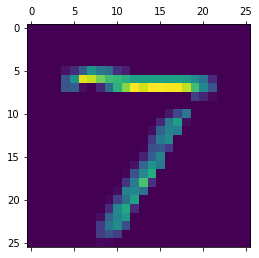

In [6]:
# Plot the activations of the first hidden layer
import matplotlib
import matplotlib.pyplot as plt
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()